# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [35]:
import pandas as pd 

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [36]:
apple=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')


### Step 3. Assign it to a variable apple

In [6]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [8]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [49]:
apple['Date'].astype('datetime64[ns]')

8464   1980-12-12
8463   1980-12-15
8462   1980-12-16
8461   1980-12-17
8460   1980-12-18
          ...    
4      2014-07-01
3      2014-07-02
2      2014-07-03
1      2014-07-07
0      2014-07-08
Name: Date, Length: 8465, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [38]:
apple.set_index('Date')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [39]:
duplicates = apple[apple.duplicated(subset=['Date'],keep=False)]
if len(duplicates)>0:
    print("the duplicates is found")
    print(duplicates)
else:
    print("the duplicates not found")

the duplicates not found


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [40]:
apple.sort_values(by='Date',inplace=True)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


### Step 9. Get the last business day of each month

In [33]:
import pandas as pd

# Load the dataset
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

# Convert the 'Date' column to datetime format
apple['Date'] = pd.to_datetime(apple['Date'])

# Set 'Date' as the index
apple.set_index('Date', inplace=True)

# Resample the data by month and get the last business day of each month
last_business_day_of_month = apple.resample('M').apply(lambda x: x.index.max() + pd.offsets.BMonthEnd())

print(last_business_day_of_month)


                 Open       High        Low      Close     Volume  Adj Close
Date                                                                        
1980-12-31 1981-01-30 1981-01-30 1981-01-30 1981-01-30 1981-01-30 1981-01-30
1981-01-31 1981-02-27 1981-02-27 1981-02-27 1981-02-27 1981-02-27 1981-02-27
1981-02-28 1981-03-31 1981-03-31 1981-03-31 1981-03-31 1981-03-31 1981-03-31
1981-03-31 1981-04-30 1981-04-30 1981-04-30 1981-04-30 1981-04-30 1981-04-30
1981-04-30 1981-05-29 1981-05-29 1981-05-29 1981-05-29 1981-05-29 1981-05-29
...               ...        ...        ...        ...        ...        ...
2014-03-31 2014-04-30 2014-04-30 2014-04-30 2014-04-30 2014-04-30 2014-04-30
2014-04-30 2014-05-30 2014-05-30 2014-05-30 2014-05-30 2014-05-30 2014-05-30
2014-05-31 2014-06-30 2014-06-30 2014-06-30 2014-06-30 2014-06-30 2014-06-30
2014-06-30 2014-07-31 2014-07-31 2014-07-31 2014-07-31 2014-07-31 2014-07-31
2014-07-31 2014-07-31 2014-07-31 2014-07-31 2014-07-31 2014-07-31 2014-07-31

### Step 10.  What is the difference in days between the first day and the oldest

In [53]:
apple['Date'] = pd.to_datetime(apple['Date'])
first_date=apple['Date'].min()
oldest_date=apple['Date'].max()
thedifference=(first_date-oldest_date).days
abs(thedifference)

12261

### Step 11.  How many months in the data we have?

In [71]:

apple['Date'] = pd.to_datetime(apple['Date'])

# Extract year and month from the 'Date' column
apple['YearMonth'] = apple['Date'].dt.to_period('M')

num_months = apple['YearMonth'].nunique()

print("Number of unique months in the dataset:", num_months)


Number of unique months in the dataset: 404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

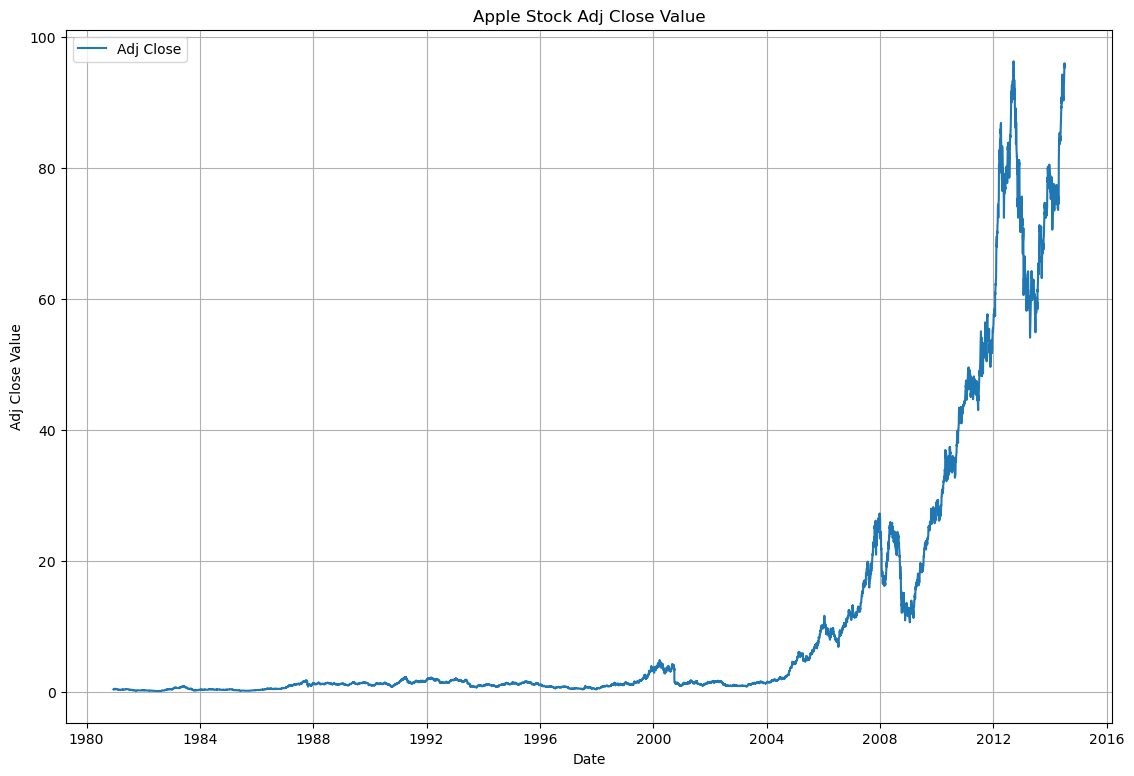

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

apple['Date'] = pd.to_datetime(apple['Date'])

apple.set_index('Date', inplace=True)

plt.figure(figsize=(13.5, 9))
plt.plot(apple.index, apple['Adj Close'], label='Adj Close')
plt.title('Apple Stock Adj Close Value')
plt.xlabel('Date')
plt.ylabel('Adj Close Value')
plt.legend()
plt.grid(True)
plt.show()
